In [9]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io.wavfile import write

plt.rcParams.update({'font.size': 18})

In [10]:
PATH = "/home/jishnu/ASTRO/Pulsar/Vela_data/"
# vol_filename = "ch00_B0833-45_20150612_191438_010_4.txt"
vol_filename = "vela.txt"
vol_a = np.loadtxt(PATH + vol_filename, usecols=0)
vol_b = np.loadtxt(PATH + vol_filename, usecols=1)

# vol_full = np.zeros([len(vol_a), 2], dtype=np.float32)
# vol_full[:,0] = vol_a
# vol_full[:,1] = vol_b
# write(PATH+"vela.wav", int(16500), vol_full.astype(np.float32))


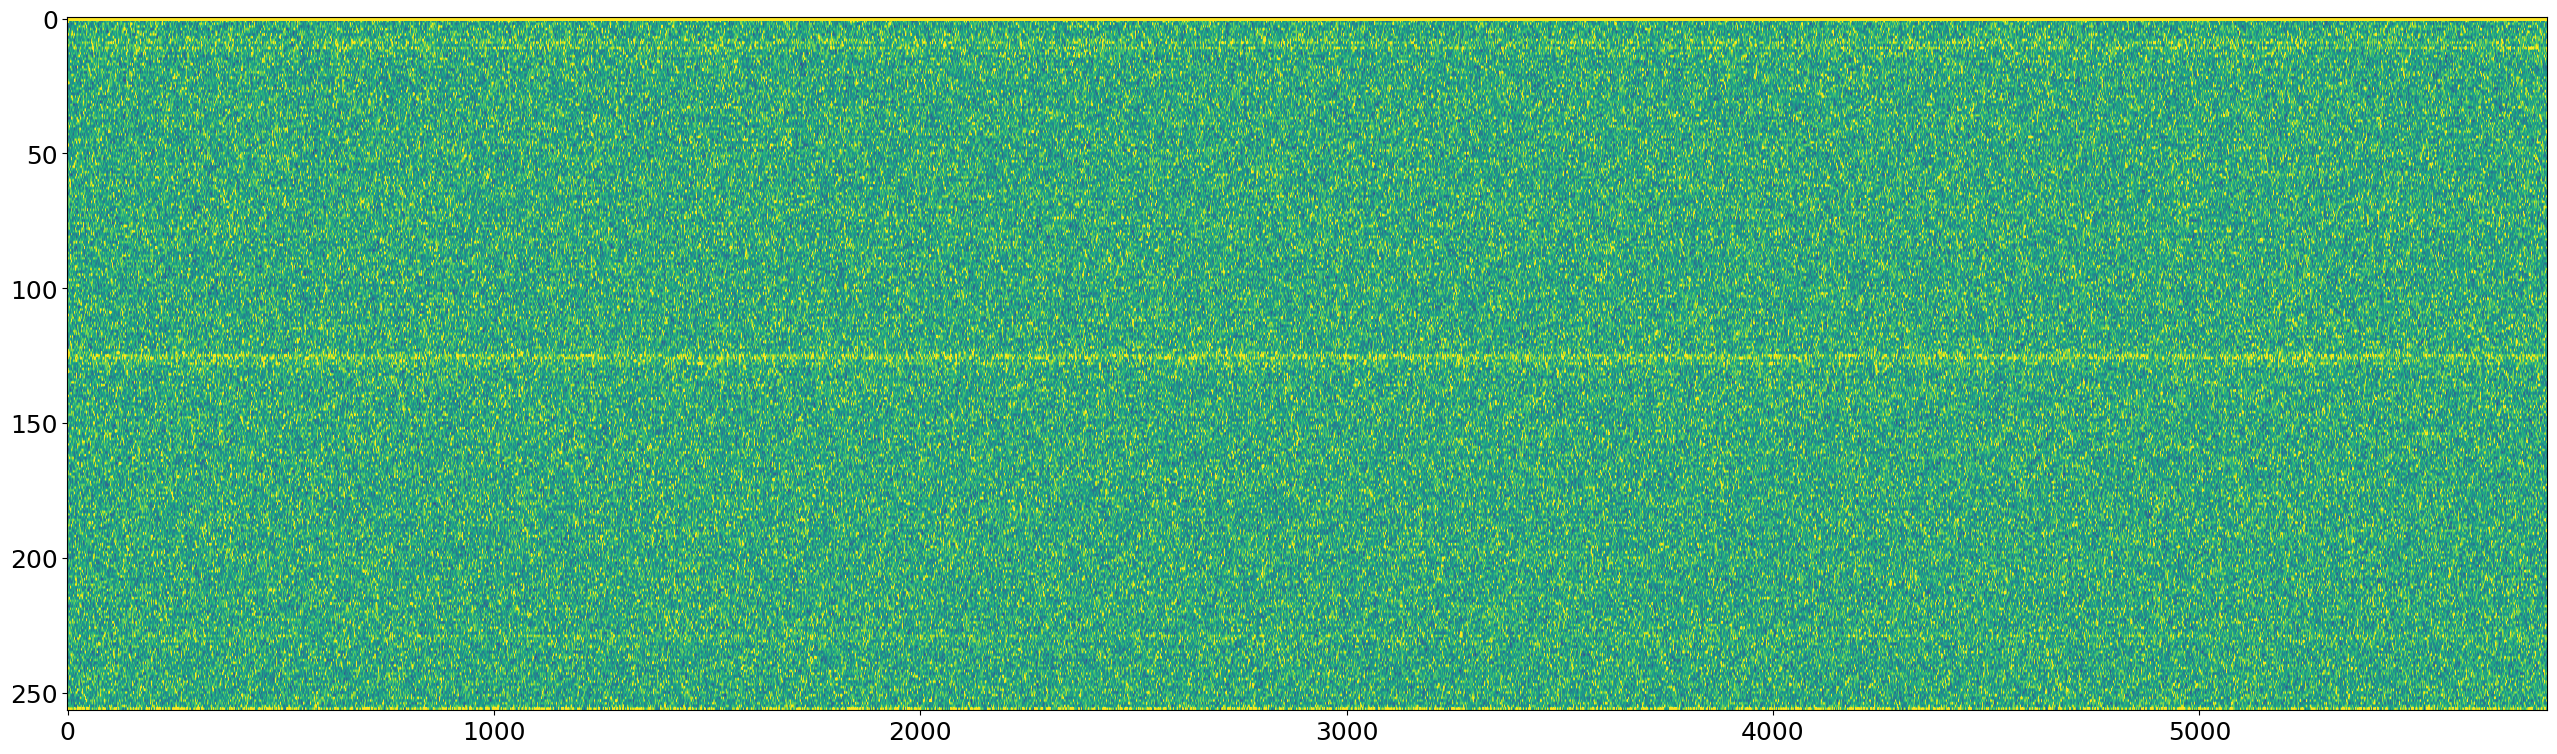

In [25]:
base_t = 1/(16.5e6)
NFFT = 512
fft_t = NFFT*base_t
req_t = 1e-3

Nav = int(req_t/fft_t)

vol_a_matrix = np.reshape(vol_a, (NFFT, int(len(vol_a)/NFFT)))
vol_b_matrix = np.reshape(vol_b, (NFFT, int(len(vol_b)/NFFT)))

sig_a_fft = np.fft.rfft(vol_a_matrix, axis=0)
sig_b_fft = np.fft.rfft(vol_b_matrix, axis=0)

cross_spec = np.zeros(sig_b_fft.shape, dtype=np.complex128)

for i in range(sig_a_fft.shape[0]):
    cross_spec[i] = sig_a_fft[i]*np.conj(sig_a_fft[i])

sig_av = np.zeros([cross_spec.shape[0], int(cross_spec.shape[1]/Nav)])

for i in range(sig_av.shape[1]):
    sig_av[:,i] = np.mean(np.abs(cross_spec[:,i*Nav:(i+1)*Nav])**2, axis=1)

plt.figure(figsize=(32,9))
plt.imshow(sig_av, aspect='auto', vmin=np.min(sig_av), vmax=np.max(sig_av)/70, cmap='rainbow')
